In [58]:
# to be done
# guest satisfication rating to numeric
# remove outlier before concat

# Introduction



In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Importing of dataset and checking dataset information

Since our data comes from several csv files. We created a column for the city name and a categorical column for whether the purchase was on a weekday. Checking the number of values in the columns, London and Rome have more than 9000 values which is significantly higher than some of the other cities. 

#We decided to remove outliers per city before combining the data to avoid removing too much data from a certain city. If one #city has much higher median realSum for its listings, removing outliers after combining the data could lead to a #disproportionate amount of data from one city being removed.  

We also removed the 'unnamed: 0' column which is a duplicate index column.

In [2]:
def concatcsv(inputfile,output):
    tempdata = pd.read_csv(inputfile)
    tempdata['city'] = inputfile.split('_')[0]
    tempdata['weekdays'] = inputfile.split('_')[1].split('.')[0] == 'weekdays'
    output = pd.concat([output,tempdata],axis=0)
    return output

In [3]:
data = pd.read_csv('amsterdam_weekdays.csv',header='infer')
data['city']='amsterdam'
data['weekdays']=1
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [4]:
data = concatcsv('amsterdam_weekends.csv',data)
data = concatcsv('athens_weekends.csv',data)
data = concatcsv('athens_weekdays.csv',data)
data = concatcsv('barcelona_weekends.csv',data)
data = concatcsv('barcelona_weekdays.csv',data)
data = concatcsv('berlin_weekends.csv',data)
data = concatcsv('berlin_weekdays.csv',data)
data = concatcsv('budapest_weekends.csv',data)
data = concatcsv('budapest_weekdays.csv',data)
data = concatcsv('lisbon_weekends.csv',data)
data = concatcsv('lisbon_weekdays.csv',data)
data = concatcsv('london_weekends.csv',data)
data = concatcsv('london_weekdays.csv',data)
data = concatcsv('paris_weekends.csv',data)
data = concatcsv('paris_weekdays.csv',data)
data = concatcsv('rome_weekends.csv',data)
data = concatcsv('rome_weekdays.csv',data)
data = concatcsv('vienna_weekends.csv',data)
data = concatcsv('vienna_weekdays.csv',data)

In [5]:
data['weekdays'].value_counts()

0    26207
1    25500
Name: weekdays, dtype: int64

In [6]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [7]:
data.drop(columns=data.columns[0],inplace=True)

In [8]:
print(data.dtypes)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekdays                        int64
dtype: object


In [9]:
# print(data.dtypes)
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# About the dataset: 
    https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=lisbon_weekends.csv
    
    realSum: total price of the airbnb listing (numeric float)
    room_type: Type of room offered (private,shared,etc.) (categorical)
    room_shared: Whether the room_type is shared (boolean)
    room_private: Whether the room_type is private (boolean)
    person_capacity: maximum number of people that can stay in the room (numeric int)
    host_is_superhost: Whether the host is a superhost, which is a verification that the host has been good (boolean)
    multi: Whether the listing is for multiple rooms (boolean)
    biz: Whether the listing is for business purposes (boolean)
    cleanliness_rating: cleanliness rating of room from 1-10 (ordinal categorical)
    guest_satisfaction_overall: overall guest satisfaction rating of room from 1-10 (ordinal categorical)
    bedrooms: number of bedrooms in the listing (ordinal categorical)
    dist: distance from city centre (numeric float)
    metro_dist: distance from nearest metro station (numeric float)
    lng: longitude of listing (numeric float)
    lat: lattitude of listing (numeric float)
    city: city where listing is located (Str)
    weekdays: Whether the listing is on a weekday(1) or weekend(0) (boolean)
    
   

# Cleaing and preparing of dataset

Firstly, we check for any null values or duplicated values.

In [10]:
print(data.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
weekdays                      0
dtype: int64


In [11]:
data.duplicated().sum()

0

<AxesSubplot: xlabel='realSum'>

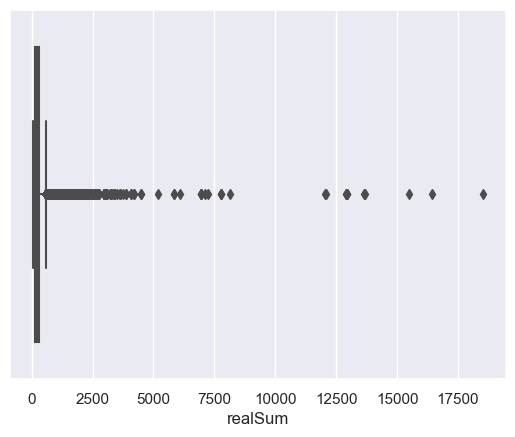

In [12]:
sb.boxplot(x=data['realSum'],orient = 'h')

<AxesSubplot: xlabel='realSum', ylabel='Count'>

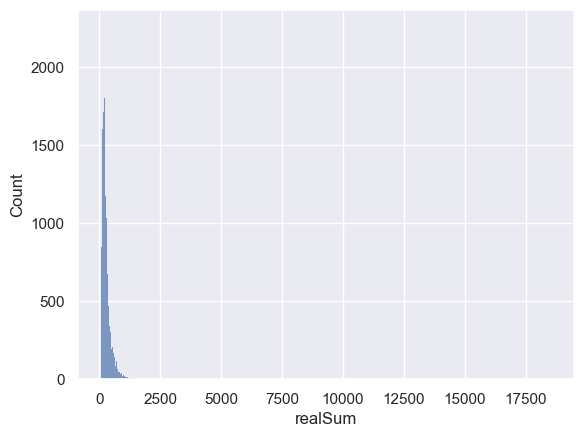

In [13]:
sb.histplot(data=data['realSum'])

In [14]:
data['realSum'].skew()

21.419956563350983

Looking at the boxplot, there appears to be many outliers. The histplot and skew value also indicate that data is positive skewed with many and large outliers at greater values. The median being around 211 but there are many listings above even the 2500 mark.

Next we will remove the outliers from the data using the interquartile range(IQR). Since lower limit is below 0, we do not have any outliers below lower limit. Before removal, we checked the spread of cities and room type in the outliers to make sure we are not removing too many data of a certain attribute. The cities and room type seem proportional to the number of each attribute in our original dataset so we decided to remove these outliers.


In [15]:
def outlier(df, col):
    sorted(df[col])
    Q1,Q3 = np.percentile(df[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [16]:
lower , upper = outlier(data, 'realSum')
print("lower: ",lower)
print("upper: ",upper)

lower:  -107.660995498034
upper:  576.1074557199221


In [17]:
data['realSum'].quantile(0.9)

500.88004895552956

In [18]:
tempdf = data[data['realSum']>upper]

In [19]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [20]:
tempdf['city'].value_counts()

london       1332
paris         979
amsterdam     740
barcelona     231
berlin        104
rome           87
lisbon         67
vienna         54
budapest       42
athens         26
Name: city, dtype: int64

In [21]:
data['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

In [22]:
tempdf['room_type'].value_counts()

Entire home/apt    3312
Private room        348
Shared room           2
Name: room_type, dtype: int64

In [23]:
outlierindex = data[data['realSum']>upper].index
data.drop(index=outlierindex, inplace=True)

<AxesSubplot: xlabel='realSum'>

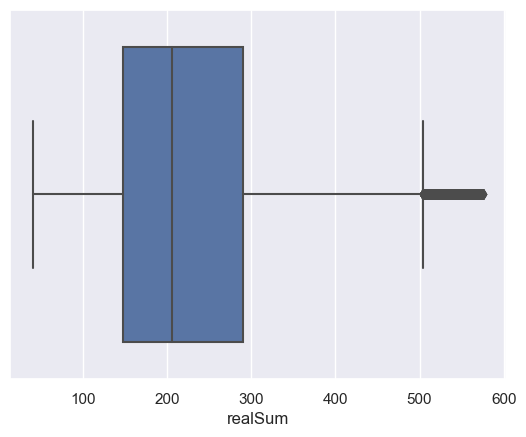

In [24]:
sb.boxplot(x=data['realSum'],orient = 'h')

<AxesSubplot: xlabel='realSum', ylabel='Count'>

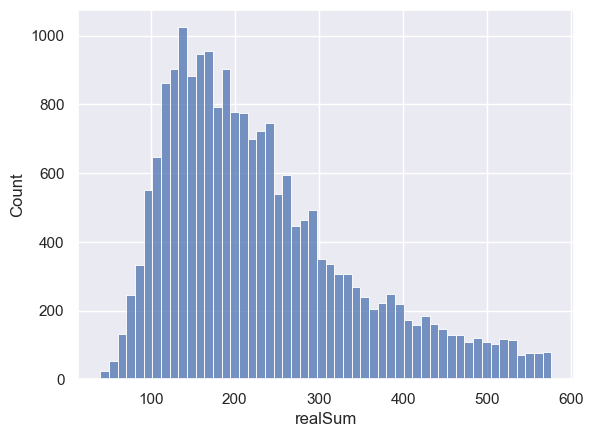

In [25]:
sb.histplot(data=data['realSum'])

In [26]:
data['realSum'].skew()

0.9588883821807196

In [85]:
data['room_type'].value_counts()

Entire home/apt    12164
Private room        7958
Shared room          138
Name: room_type, dtype: int64

In [86]:
data['room_shared'].value_counts()

False    20122
True       138
Name: room_shared, dtype: int64

In [87]:
data['room_private'].value_counts()

False    12302
True      7958
Name: room_private, dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20260 entries, 0 to 1735
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     20260 non-null  float64
 1   room_type                   20260 non-null  object 
 2   room_shared                 20260 non-null  bool   
 3   room_private                20260 non-null  bool   
 4   person_capacity             20260 non-null  float64
 5   host_is_superhost           20260 non-null  bool   
 6   multi                       20260 non-null  int64  
 7   biz                         20260 non-null  int64  
 8   cleanliness_rating          20260 non-null  float64
 9   guest_satisfaction_overall  20260 non-null  float64
 10  bedrooms                    20260 non-null  int64  
 11  dist                        20260 non-null  float64
 12  metro_dist                  20260 non-null  float64
 13  attr_index                  2026

# Exploratory Data Analysis (EDA)

We have decided to disregard the room_shared and room_private columns as those columns are represented by the room_type column.

# a) Numerical Analysis

**Description:** Next, we will analyse the numerical variables in the dataset.

 - a1) dist
 - a2) metro_dist
 - a3) guest_satisfaction_overall
 
 **Analysis:** 

## a1) dist

**Analysis:** 

In [31]:
dist = pd.DataFrame(data['dist'])
metrodist = pd.DataFrame(data['metro_dist'])
guest_satisfaction = pd.DataFrame(data['guest_satisfaction_overall'])

<AxesSubplot: >

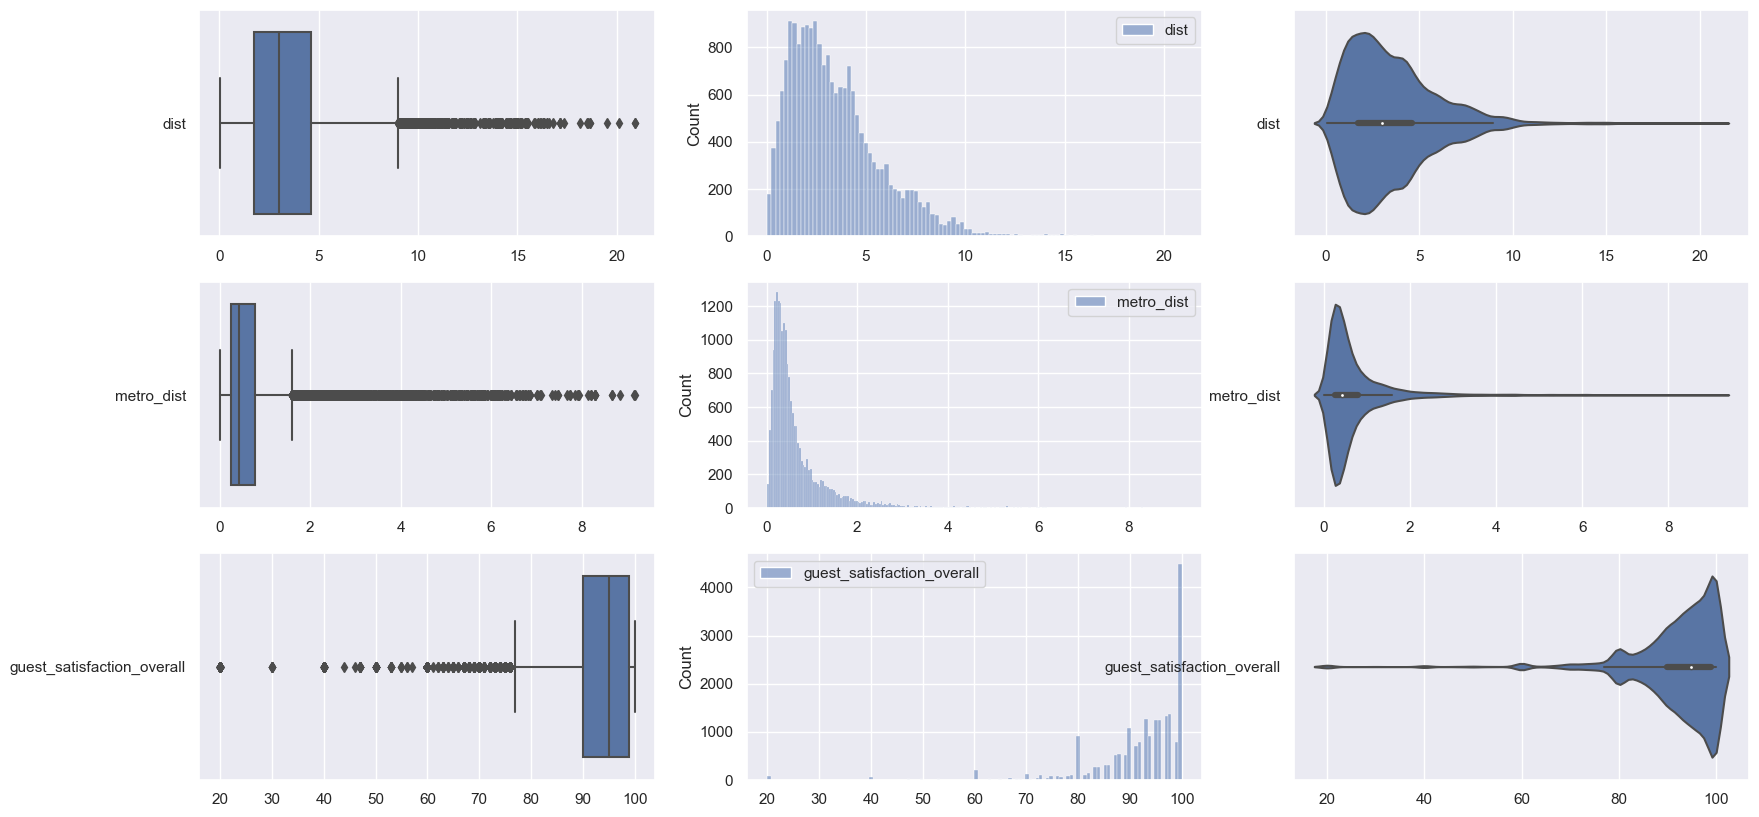

In [32]:
f, axes = plt.subplots(3, 3, figsize=(20, 10))

sb.boxplot(data = dist, orient = "h", ax = axes[0,0])
sb.histplot(data = dist, ax = axes[0,1])
sb.violinplot(data = dist, orient = "h", ax = axes[0,2])

sb.boxplot(data = metrodist, orient = "h", ax = axes[1,0])
sb.histplot(data = metrodist, ax = axes[1,1])
sb.violinplot(data = metrodist, orient = "h", ax = axes[1,2])

sb.boxplot(data = guest_satisfaction, orient = "h", ax = axes[2,0])
sb.histplot(data = guest_satisfaction, ax = axes[2,1])
sb.violinplot(data = guest_satisfaction, orient = "h", ax = axes[2,2])

In [33]:
jointdf = pd.concat([data['realSum'],dist,metrodist,guest_satisfaction],axis=1)

<AxesSubplot: >

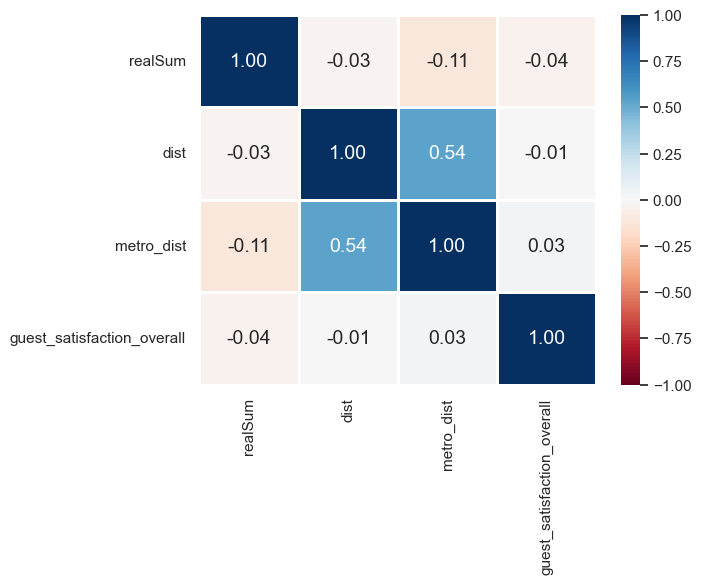

In [34]:
sb.heatmap(jointdf.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

In [90]:
dist.describe()

,dist
count,20260.000000
mean,3.482981
std,2.375522
min,0.034661
25%,1.730341
50%,2.980440
75%,4.625697
max,20.895102


In [92]:
# distlower , distupper = outlier(data, 'dist')
# print("lower: ",distlower)
# print("upper: ",distupper)

lower:  -2.6126920559893634
upper:  8.968729936273014


In [93]:
# outlierindex = data[data['dist']>distupper].index
# data.drop(index=outlierindex, inplace=True)

# b) Categorical Analysis

**Description:** Next, we will analyse the categorical variables in the dataset.

 - b1) room_type
 - b2) person_capacity
 - b3) host_is_superhost
 - b4) multi
 - b5) biz
 - b6) cleanliness_rating
 - b7) bedrooms
 - b8) city
 - b9) weekdays

## b1) room_type


**Analysis:** The results show that entire home/apt are the most expensive on average followed by private room then shared room. This makes sense as we would expect purchasing more rooms to be more expensive and private room should be priced higher than shared room due to privacy being a beneficial trait. The boxplots for the 3 room_types are significantly different, thus room_type seems to be correlated to realSum.

Private room:
 count    7958.000000
mean      185.821499
std        85.882846
min        40.184236
25%       126.949244
50%       164.867471
75%       220.372069
max       573.155530
Name: realSum, dtype: float64
Entire home/apt:
 count    12164.000000
mean       263.933611
std        117.227054
min         51.086167
25%        175.052141
50%        241.975078
75%        335.024431
max        575.977798
Name: realSum, dtype: float64
Shared room:
 count    138.000000
mean     141.292006
std       73.858006
min       53.343986
25%       98.249976
50%      122.551409
75%      160.676878
max      556.202815
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

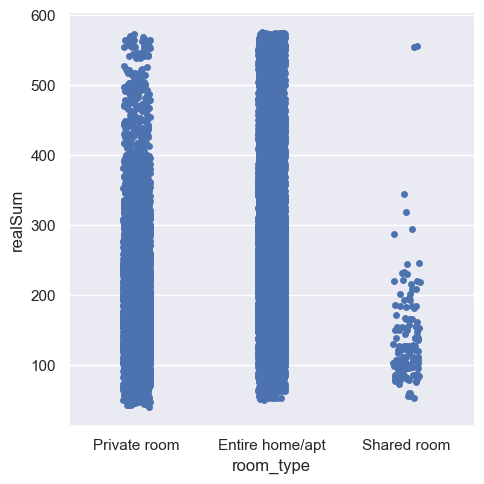

<Figure size 1000x10000 with 0 Axes>

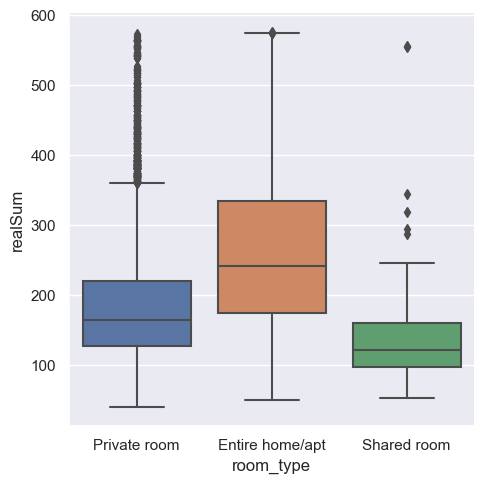

<Figure size 1000x10000 with 0 Axes>

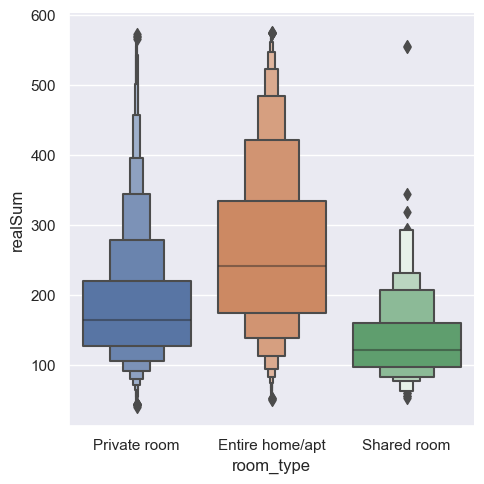

In [36]:
#room type
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="room_type", y="realSum",)
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="room_type", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data,x="room_type", y="realSum", kind="boxen",
)
print("Private room:\n",(data['realSum'].loc[data['room_type'] =='Private room']).describe())
print("Entire home/apt:\n",(data['realSum'].loc[data['room_type'] =='Entire home/apt']).describe())
print("Shared room:\n",(data['realSum'].loc[data['room_type'] =='Shared room']).describe())

## b2) person_capacity

**Analysis:** 

In [38]:
data['person_capacity'].value_counts()

2.0    10154
4.0     5184
3.0     2451
6.0     1371
5.0     1100
Name: person_capacity, dtype: int64

2.0:
 count    10154.000000
mean       205.934926
std         96.971544
min         44.179161
25%        134.681704
50%        182.682449
75%        252.357769
max        575.272231
Name: realSum, dtype: float64
4.0:
 count    2451.000000
mean      219.748400
std       106.102709
min        40.184236
25%       138.963748
50%       194.749024
75%       277.165167
max       575.507420
Name: realSum, dtype: float64
6.0:
 count    5184.000000
mean      261.858481
std       118.958307
min        46.165022
25%       170.668412
50%       238.162199
75%       331.848030
max       575.272231
Name: realSum, dtype: float64
8.0:
 count    1100.000000
mean      274.016481
std       122.919001
min        68.193003
25%       177.623735
50%       244.634245
75%       357.278749
max       573.212788
Name: realSum, dtype: float64
10.0:
 count    1371.000000
mean      306.488089
std       128.583154
min        60.459776
25%       203.095685
50%       287.697485
75%       405.852408
max       575.977798
N

<Figure size 1000x10000 with 0 Axes>

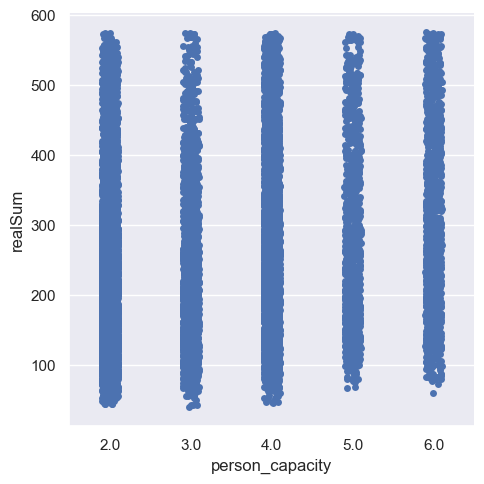

<Figure size 1000x10000 with 0 Axes>

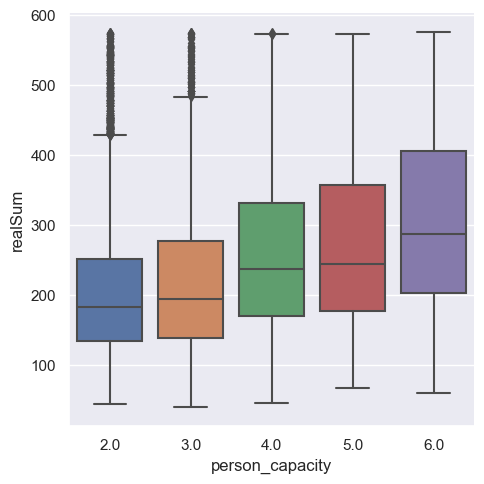

<Figure size 1000x10000 with 0 Axes>

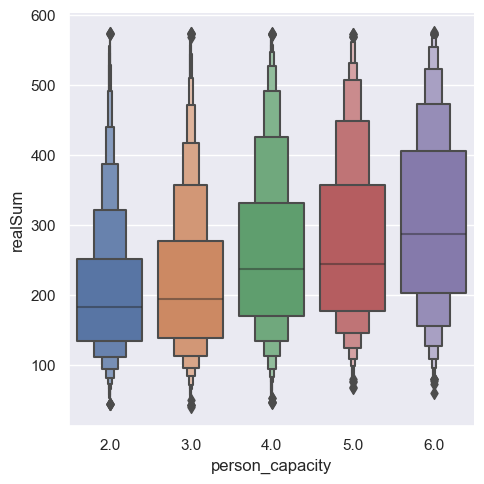

In [37]:
#person capacity
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="person_capacity", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="person_capacity", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("person_capacity"),
    x="person_capacity", y="realSum", kind="boxen",
)
print("2.0:\n",(data['realSum'].loc[data['person_capacity']==2.0]).describe())
print("4.0:\n",(data['realSum'].loc[data['person_capacity']==3.0]).describe())
print("6.0:\n",(data['realSum'].loc[data['person_capacity']==4.0]).describe())
print("8.0:\n",(data['realSum'].loc[data['person_capacity']==5.0]).describe())
print("10.0:\n",(data['realSum'].loc[data['person_capacity']==6.0]).describe())

## b3) host_is_superhost

**Analysis:** 

Host not superhost:
 count    15399.000000
mean       236.408069
std        115.553319
min         40.184236
25%        148.169054
50%        208.075188
75%        297.791034
max        575.977798
Name: realSum, dtype: float64
Host is superhost:
 count    4861.000000
mean      219.770904
std       101.899675
min        45.227662
25%       143.884892
50%       196.807143
75%       269.741895
max       574.144841
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

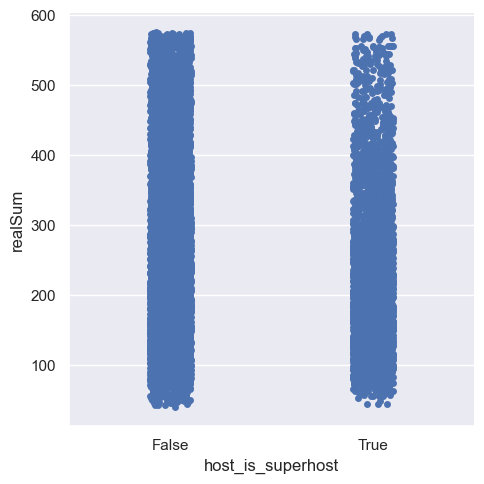

<Figure size 1000x10000 with 0 Axes>

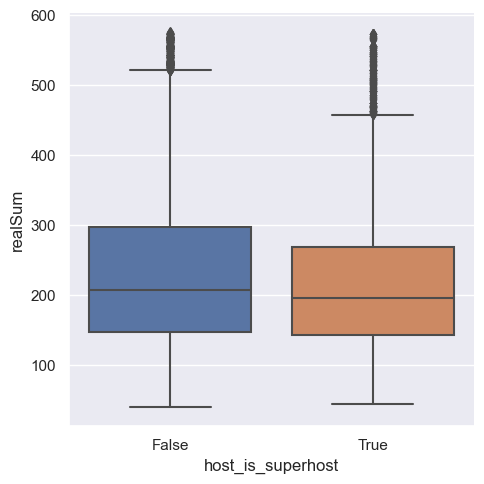

<Figure size 1000x10000 with 0 Axes>

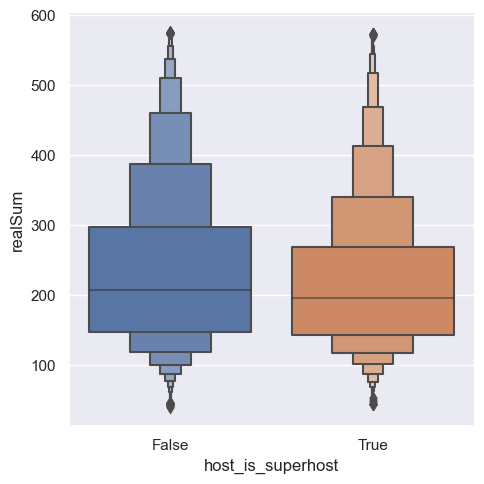

In [39]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="host_is_superhost", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="host_is_superhost", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("host_is_superhost"),
    x="host_is_superhost", y="realSum", kind="boxen",
)
print("Host not superhost:\n",(data['realSum'].loc[data['host_is_superhost']==False]).describe())
print("Host is superhost:\n",(data['realSum'].loc[data['host_is_superhost']==True]).describe())

## b4) multi

**Analysis:**

Listing not for multiple rooms:
 count    14386.000000
mean       237.467349
std        114.118609
min         42.884259
25%        149.860894
50%        211.069418
75%        297.514053
max        575.977798
Name: realSum, dtype: float64
Listing for multiple rooms:
 count    5874.000000
mean      220.045785
std       107.987614
min        40.184236
25%       139.117357
50%       194.232652
75%       271.597581
max       575.507420
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

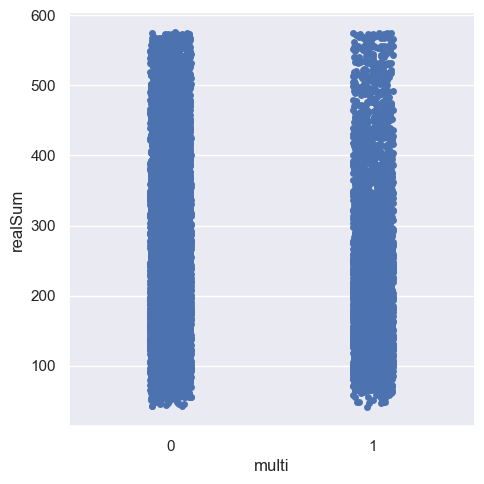

<Figure size 1000x10000 with 0 Axes>

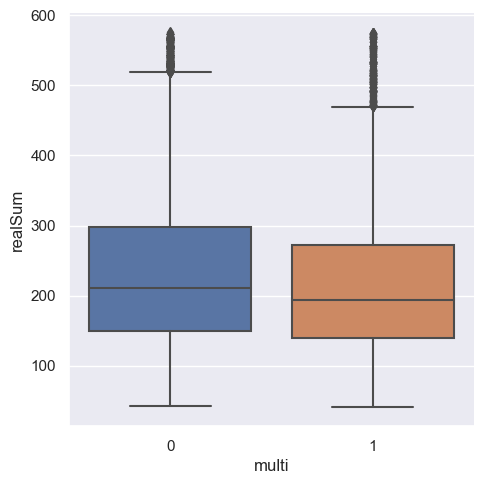

<Figure size 1000x10000 with 0 Axes>

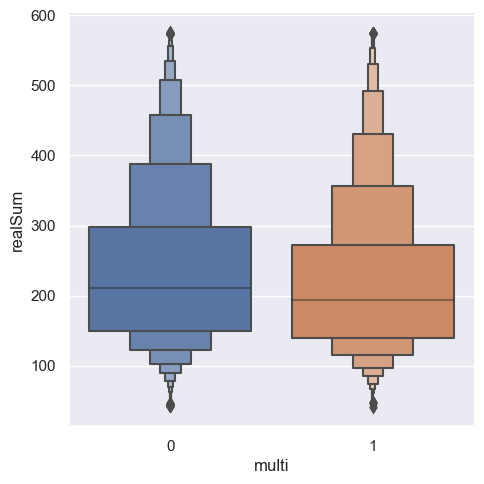

In [40]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="multi", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="multi", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("multi"),
    x="multi", y="realSum", kind="boxen",
)

print("Listing not for multiple rooms:\n",(data['realSum'].loc[data['multi']==0]).describe())
print("Listing for multiple rooms:\n",(data['realSum'].loc[data['multi']==1]).describe())

## b5) biz

**Analysis:**

Listing is not for business:
 count    13193.000000
mean       226.766062
std        108.770820
min         40.184236
25%        144.699812
50%        202.464171
75%        282.187361
max        575.507420
Name: realSum, dtype: float64
Listing for business:
 count    7067.000000
mean      242.964423
std       118.848091
min        42.884259
25%       149.636172
50%       213.483936
75%       308.852302
max       575.977798
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

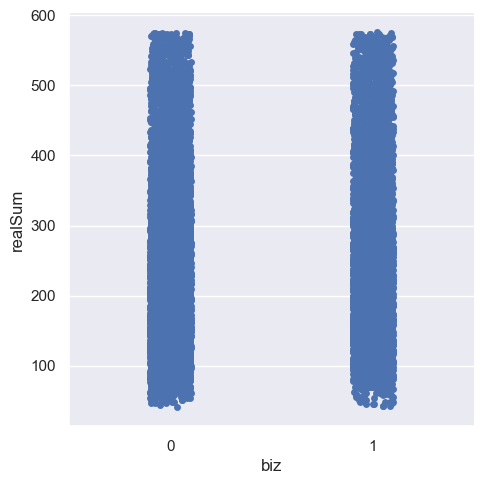

<Figure size 1000x10000 with 0 Axes>

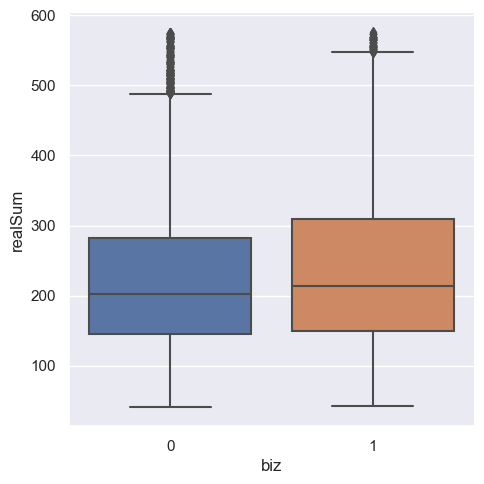

<Figure size 1000x10000 with 0 Axes>

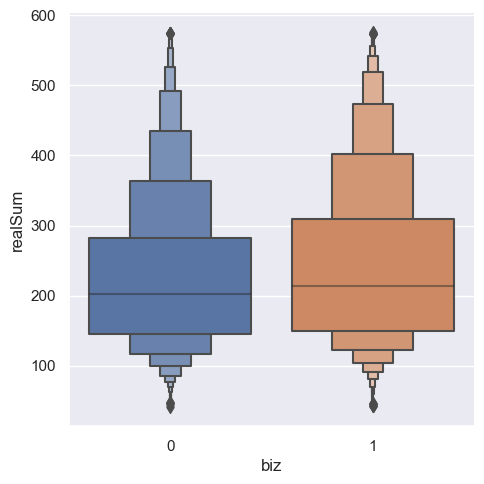

In [41]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="biz", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="biz", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("biz"),
    x="biz", y="realSum", kind="boxen",
)
print("Listing is not for business:\n",(data['realSum'].loc[data['biz']== 0]).describe())
print("Listing for business:\n",(data['realSum'].loc[data['biz']==1]).describe())

## b6) Cleanliness_rating

We decided to merge the ratings below 6 into a category (<6) due to the lower number count.
**Analysis:**

In [42]:
data['cleanliness_rating'].value_counts()

10.0    11629
9.0      5915
8.0      1849
7.0       437
6.0       229
4.0        78
2.0        75
5.0        42
3.0         6
Name: cleanliness_rating, dtype: int64

Cleanliness rating 2.0:
 count     75.000000
mean     241.559307
std      129.045155
min       46.057092
25%      143.782293
50%      199.205061
75%      308.567934
max      554.105224
Name: realSum, dtype: float64
Cleanliness rating 4.0:
 count     78.000000
mean     286.067612
std      147.587707
min       81.375385
25%      151.102129
50%      243.265915
75%      430.160634
max      540.934641
Name: realSum, dtype: float64
Cleanliness rating 6.0:
 count    229.000000
mean     243.762492
std      129.854109
min       54.328653
25%      142.289329
50%      207.201486
75%      331.577966
max      575.272231
Name: realSum, dtype: float64
Cleanliness rating 8.0:
 count    1849.000000
mean      231.342637
std       117.811745
min        51.320507
25%       141.818952
50%       199.812383
75%       295.747317
max       575.977798
Name: realSum, dtype: float64
Cleanliness rating 10.0:
 count    11629.000000
mean       232.348627
std        110.364474
min         42.884259
25%        148.337

<Figure size 1000x10000 with 0 Axes>

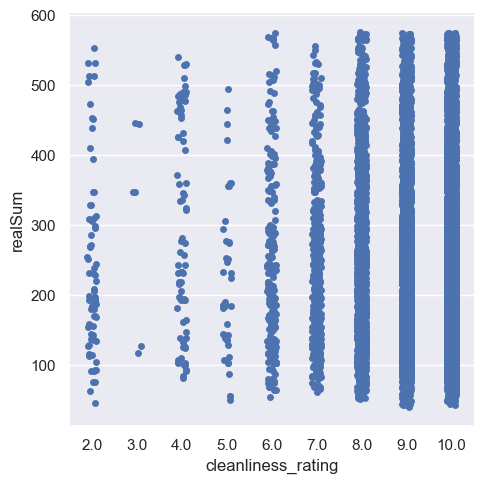

<Figure size 1000x10000 with 0 Axes>

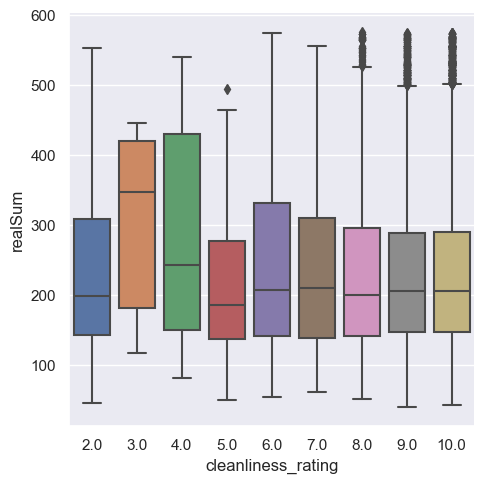

<Figure size 1000x10000 with 0 Axes>

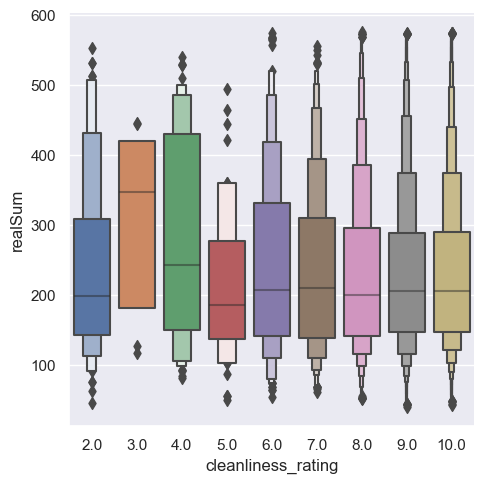

In [43]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="cleanliness_rating", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="cleanliness_rating", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("cleanliness_rating"),
    x="cleanliness_rating", y="realSum", kind="boxen",
)
print("Cleanliness rating 2.0:\n",(data['realSum'].loc[data['cleanliness_rating']== 2.0]).describe())
print("Cleanliness rating 4.0:\n",(data['realSum'].loc[data['cleanliness_rating']==4.0]).describe())
print("Cleanliness rating 6.0:\n",(data['realSum'].loc[data['cleanliness_rating']== 6.0]).describe())
print("Cleanliness rating 8.0:\n",(data['realSum'].loc[data['cleanliness_rating']==8.0]).describe())
print("Cleanliness rating 10.0:\n",(data['realSum'].loc[data['cleanliness_rating']== 10.0]).describe())

## b7) bedrooms

We decided to remove 8 and 9?
**Analysis:**

In [45]:
data['bedrooms'].value_counts()

1    14896
2     3220
0     1734
3      383
4       23
9        2
5        1
8        1
Name: bedrooms, dtype: int64

0 Bedrooms:
 count    1734.000000
mean      242.510247
std       101.862895
min        44.179161
25%       167.536583
50%       227.598301
75%       300.064122
max       574.566664
Name: realSum, dtype: float64
1 Bedrooms:
 count    14896.000000
mean       217.641960
std        105.777138
min         42.884259
25%        138.943841
50%        193.245779
75%        268.585809
max        575.507420
Name: realSum, dtype: float64
2 Bedrooms:
 count    3220.000000
mean      284.272306
std       124.650760
min        57.882033
25%       184.929745
50%       260.845044
75%       377.356342
max       575.977798
Name: realSum, dtype: float64
3 Bedrooms:
 count    383.000000
mean     322.046342
std      130.164766
min       40.184236
25%      226.398149
50%      306.519700
75%      416.695725
max      574.194001
Name: realSum, dtype: float64
4 Bedrooms:
 count     23.000000
mean     299.856220
std      173.855313
min       77.377173
25%      132.176204
50%      263.602251
75%      439.361210
max

<Figure size 1000x10000 with 0 Axes>

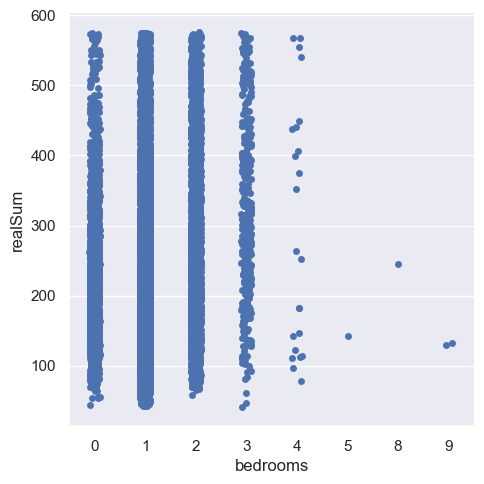

<Figure size 1000x10000 with 0 Axes>

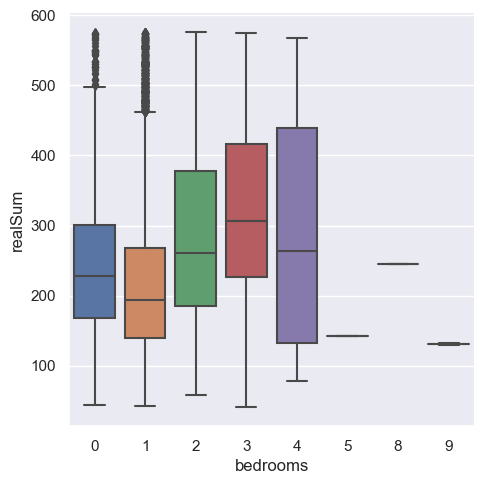

<Figure size 1000x10000 with 0 Axes>

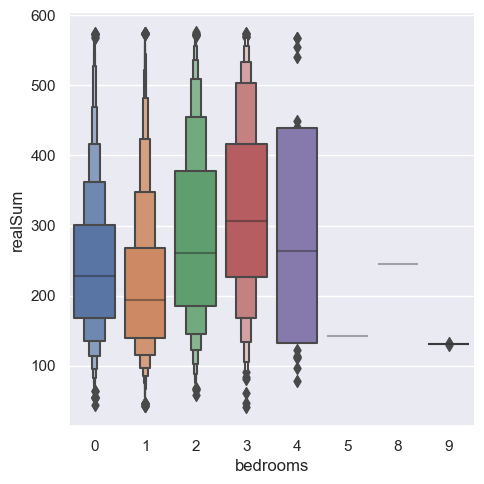

In [44]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="bedrooms", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="bedrooms", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("bedrooms"),
    x="bedrooms", y="realSum", kind="boxen",
)
print("0 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 0]).describe())
print("1 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 1]).describe())
print("2 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 2]).describe())
print("3 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==3]).describe())
print("4 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 4]).describe())
print("5 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==5]).describe())
print("6 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 6]).describe())
print("7 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 7]).describe())
print("8 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==8]).describe())
print("9 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 9]).describe())
print("10 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==10]).describe())

## b8) city

**Analysis:**

amsterdam:
 count    278.000000
mean     371.484033
std      106.827950
min      144.822253
25%      286.715253
50%      373.655473
75%      454.854358
max      568.978042
Name: realSum, dtype: float64
athens:
 count    1985.000000
mean      144.497246
std        70.215093
min        42.884259
25%        99.594591
50%       127.715417
75%       168.021934
max       562.416516
Name: realSum, dtype: float64
barcelona:
 count    567.000000
mean     224.071310
std      112.708864
min       72.846603
25%      141.271208
50%      185.258454
75%      269.741895
max      564.619359
Name: realSum, dtype: float64
berlin:
 count    404.000000
mean     214.547870
std      102.129829
min       81.331214
25%      138.999252
50%      183.112088
75%      263.450033
max      545.012620
Name: realSum, dtype: float64
budapest:
 count    1173.000000
mean      172.697477
std        73.418533
min        40.184236
25%       126.427598
50%       157.447009
75%       206.091084
max       564.459275
Name: realS

<Figure size 1000x10000 with 0 Axes>

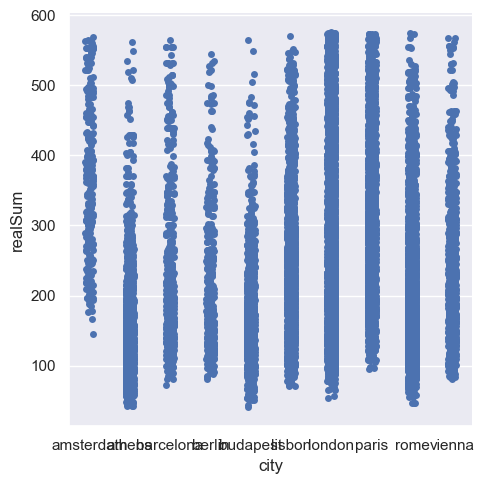

<Figure size 1000x10000 with 0 Axes>

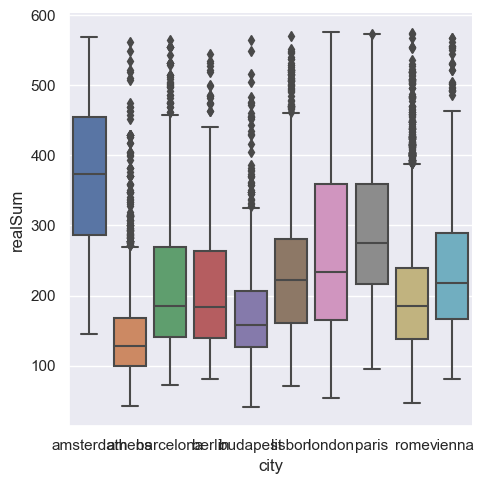

<Figure size 1000x10000 with 0 Axes>

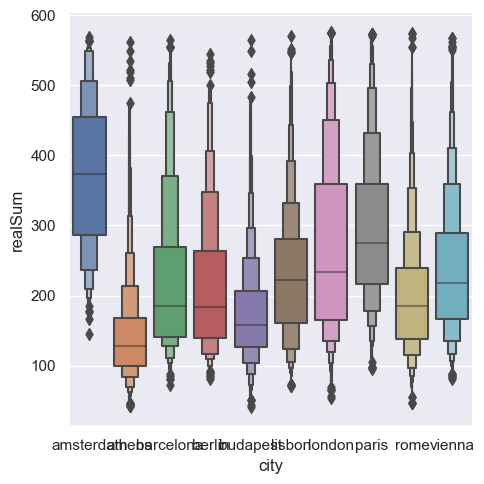

In [46]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="city", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="city", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("city"),
    x="city", y="realSum", kind="boxen",
)
print("amsterdam:\n",(data['realSum'].loc[data['city']== 'amsterdam']).describe())
print("athens:\n",(data['realSum'].loc[data['city']== 'athens']).describe())
print("barcelona:\n",(data['realSum'].loc[data['city']== 'barcelona']).describe())
print("berlin:\n",(data['realSum'].loc[data['city']=='berlin']).describe())
print("budapest:\n",(data['realSum'].loc[data['city']== 'budapest']).describe())
print("lisbon:\n",(data['realSum'].loc[data['city']=='lisbon']).describe())
print("london:\n",(data['realSum'].loc[data['city']== 'london']).describe())
print("paris:\n",(data['realSum'].loc[data['city']== 'paris']).describe())
print("rome:\n",(data['realSum'].loc[data['city']== 'rome']).describe())
print("vienna:\n",(data['realSum'].loc[data['city']== 'vienna']).describe())

## b9) weekdays

**Analysis:**

weekdays:
 count    9739.000000
mean      227.284360
std       111.202340
min        42.884259
25%       142.289329
50%       199.981200
75%       283.590115
max       575.977798
Name: realSum, dtype: float64
weekends:
 count    10521.000000
mean       237.166795
std        113.773805
min         40.184236
25%        150.328478
50%        210.880696
75%        297.373358
max        575.507420
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

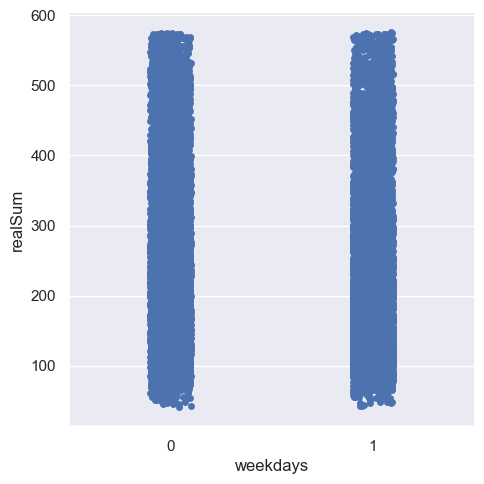

<Figure size 1000x10000 with 0 Axes>

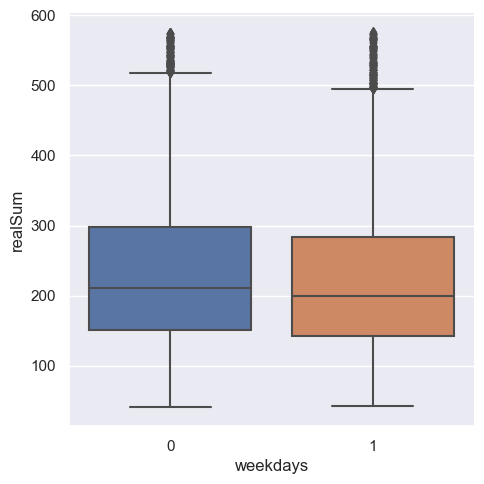

<Figure size 1000x10000 with 0 Axes>

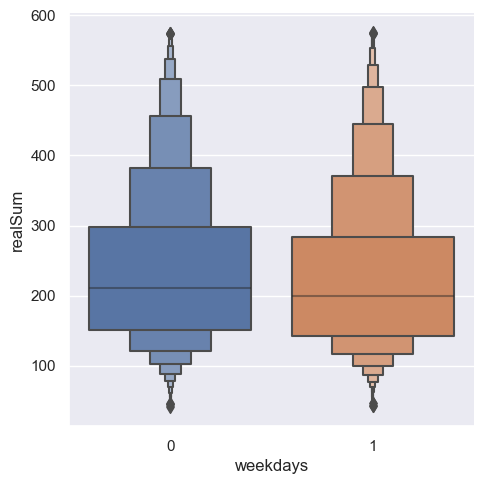

In [47]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="weekdays", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="weekdays", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("weekdays"),
    x="weekdays", y="realSum", kind="boxen",
)
print("weekdays:\n",(data['realSum'].loc[data['weekdays']== 1]).describe())
print("weekends:\n",(data['realSum'].loc[data['weekdays']== 0]).describe())

# Bivariate Analysis

# Feature Engineering

https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

One hot encoding

Creation of new columns

normalization

# Machine learning

# Linear regression

# Logistic regression



# Random Forest Regressor